In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import random 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from pandas.plotting import table

import warnings
warnings.filterwarnings("ignore")
import itertools
import scipy.stats as ss


import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split



In [56]:
df_raw = pd.read_excel("df.xlsx")
df = df_raw.iloc[:,2:]

In [57]:
df['CSP'] = df['CSP'].astype('category')
df['ETAT_CIVIL'] = df['ETAT_CIVIL'].astype('category')
df['IND_CLI_RNVA'] = df['IND_CLI_RNVA'].astype('category')
df['QUAL_VEH'] = df['QUAL_VEH'].astype('category')
df['imp_reg'] = df['imp_reg'].astype('category')
df['ind_fch_fcc'] = df['ind_fch_fcc'].astype('category')
df['imp_reg'] = df['imp_reg'].astype('category')
df['produit'] = df['produit'].astype('category')
df['proprio'] = df['proprio'].astype('category')
df['secteur_'] = df['secteur_'].astype('category')
df['ty_pp'] = df['ty_pp'].astype('category')

In [58]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
one_hot_encoded_X = pd.get_dummies(X)
print("# of columns after one-hot encoding: {0}".format(len(one_hot_encoded_X.columns)))

# of columns after one-hot encoding: 50


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_X, y, test_size=0.25, random_state=1337)

In [60]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Features Shape: (50064, 50)
Training Target Shape: (50064,)
Testing Features Shape: (16688, 50)
Testing Target Shape: (16688,)


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=2,
                            random_state=0,
                            criterion="gini",
                            bootstrap=True,
                            max_features=13,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators = 400)

In [20]:
rf.fit(X_train,y_train)

features = pd.get_dummies(df)
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('we18', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Variable: AGE_VEH              Importance: 0.12
Variable: DUREE                Importance: 0.11
Variable: MT_DMD               Importance: 0.11
Variable: MT_REV               Importance: 0.1
Variable: mt_charges           Importance: 0.09
Variable: PC_APPO              Importance: 0.05
Variable: age                  Importance: 0.05
Variable: anc_emp              Importance: 0.04
Variable: copot_               Importance: 0.03
Variable: fichage              Importance: 0.02
Variable: part_loyer           Importance: 0.02
Variable: pan_dir_             Importance: 0.01
Variable: temps                Importance: 0.01
Variable: CSP_0                Importance: 0.01
Variable: CSP_11               Importance: 0.01
Variable: CSP_12               Importance: 0.01
Variable: CSP_13               Importance: 0.01
Variable: CSP_99               Importance: 0.01
Variable: ETAT_CIVIL_C         Importance: 0.01
Variable: ETAT_CIVIL_D         Importance: 0.01
Variable: ETAT_CIVIL_M         Importance

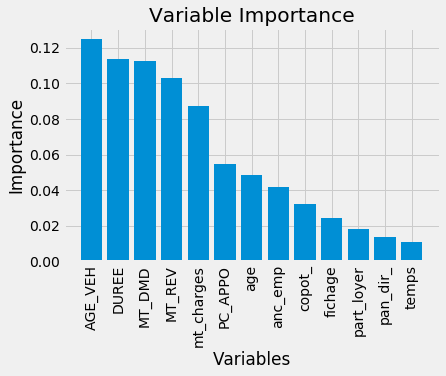

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
predictions_prob = rf.predict_proba(X_test)

# Get numerical feature importances
importances = sorted(list(rf.feature_importances_),reverse=True)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:13], importances[:13], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:13], feature_list[:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importance');

In [22]:
ident = np.arange(0,16688,1)

In [23]:
default_prob = np.column_stack((ident,predictions_prob[:,1]))
default_prob = pd.DataFrame(default_prob)
default_prob.rename(columns={1:'prob'}, inplace=True)
default_prob.rename(columns={0:'key'}, inplace=True)

In [24]:
real_prob = np.column_stack((ident,y_test))
real_prob = pd.DataFrame(real_prob)
real_prob.rename(columns={1:'true'}, inplace=True)
real_prob.rename(columns={0:'key'}, inplace=True)

In [25]:
merged = pd.merge(real_prob, default_prob, on=['key'])

In [26]:
merged_sorted = merged.sort_values(by=["prob"],ascending=False)

In [27]:
length = len(predictions_prob[:,1])
ten_prct = int(0.1*length)
score = merged_sorted[0:ten_prct]

In [28]:
indice_10 = score["true"].value_counts(1)
indice_10[1]

0.08693045563549161

In [29]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, predictions_prob[:,1])
Gini =2*AUC-1
print(Gini)

0.6078300612150334


In [61]:
df_raw = pd.read_csv("subsample_df.csv", encoding = "ISO-8859-1")

In [62]:
del df_raw["no_cnt_crypte"]
del df_raw["no_par_crypte"]
del df_raw["date_gest"]

In [63]:
df = df_raw

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11340 entries, 0 to 11339
Data columns (total 20 columns):
WE18            11340 non-null int64
genre_veh       11340 non-null object
produit         11340 non-null object
QUAL_VEH        11340 non-null object
IND_CLI_RNVA    11340 non-null object
CSP             11340 non-null object
ETAT_CIVIL      11340 non-null object
MODE_HABI       11340 non-null object
ind_fch_fcc     11340 non-null object
copot_          11340 non-null object
pan_dir_        11340 non-null object
secteur_        11340 non-null object
fichage         11340 non-null int64
bdf_cote        11340 non-null int64
duree_cl        11340 non-null int64
pc_appo2        11340 non-null int64
age2            11340 non-null int64
mt_rev2         11340 non-null int64
part_loyer2     11340 non-null int64
anc_emp2        11340 non-null int64
dtypes: int64(9), object(11)
memory usage: 1.7+ MB


In [65]:
df['CSP'] = df['CSP'].astype('category')
df['ETAT_CIVIL'] = df['ETAT_CIVIL'].astype('category')
df['IND_CLI_RNVA'] = df['IND_CLI_RNVA'].astype('category')
df['QUAL_VEH'] = df['QUAL_VEH'].astype('category')
df['ind_fch_fcc'] = df['ind_fch_fcc'].astype('category')
df['produit'] = df['produit'].astype('category')
df['secteur_'] = df['secteur_'].astype('category')
df['genre_veh'] = df['genre_veh'].astype('category')
df['copot_'] = df['copot_'].astype('category')
df['pan_dir_'] = df['pan_dir_'].astype('category')
df['fichage'] = df['fichage'].astype('category')
df['bdf_cote'] = df['bdf_cote'].astype('category')
df['duree_cl'] = df['duree_cl'].astype('category')
df['pc_appo2'] = df['pc_appo2'].astype('category')
df['age2'] = df['age2'].astype('category')
df['mt_rev2'] = df['mt_rev2'].astype('category')
df['part_loyer2'] = df['part_loyer2'].astype('category')
df['anc_emp2'] = df['anc_emp2'].astype('category')
df['MODE_HABI'] = df['MODE_HABI'].astype('category')

In [66]:
X, y = df.iloc[:,1:],df.iloc[:,0]
one_hot_encoded_X = pd.get_dummies(X)
print("# of columns after one-hot encoding: {0}".format(len(one_hot_encoded_X.columns)))

# of columns after one-hot encoding: 55


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_X, y, test_size=0.25, random_state=1337)

In [68]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Features Shape: (8505, 55)
Training Target Shape: (8505,)
Testing Features Shape: (2835, 55)
Testing Target Shape: (2835,)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=2,
                            random_state=0,
                            criterion="gini",
                            bootstrap=True,
                            max_features=13,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators = 400)

In [38]:
rf.fit(X_train,y_train)

features = pd.get_dummies(df)
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('WE18', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Variable: genre_veh_Véhicule particulier Importance: 0.04
Variable: genre_veh_Véhicule utilitaire Importance: 0.03
Variable: produit_Credit Classique Importance: 0.03
Variable: produit_Crédit Bail  Importance: 0.03
Variable: produit_Location Longue Durée Importance: 0.03
Variable: QUAL_VEH_Véhicule d'occasion Importance: 0.03
Variable: QUAL_VEH_Véhicule neuf Importance: 0.03
Variable: IND_CLI_RNVA_Non     Importance: 0.03
Variable: IND_CLI_RNVA_Oui     Importance: 0.03
Variable: CSP_Agriculteurs     Importance: 0.03
Variable: CSP_Artisans         Importance: 0.03
Variable: CSP_Autres           Importance: 0.03
Variable: CSP_Commerçants      Importance: 0.03
Variable: CSP_Professions libérales Importance: 0.03
Variable: ETAT_CIVIL_Marié     Importance: 0.03
Variable: ETAT_CIVIL_Personne vivant seule Importance: 0.02
Variable: MODE_HABI_Non Propriétaire Importance: 0.02
Variable: MODE_HABI_Propriétaire Importance: 0.02
Variable: ind_fch_fcc_Non      Importance: 0.02
Variable: ind_fch_fcc

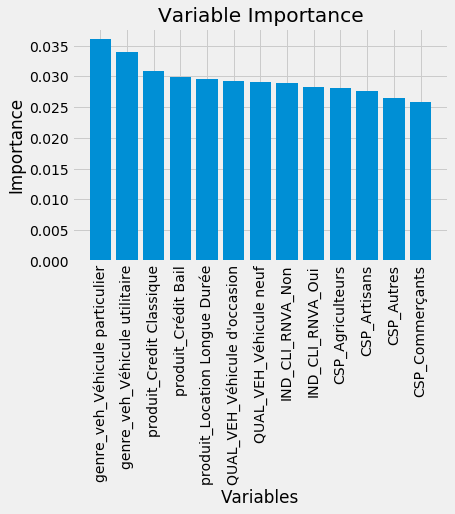

In [39]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
predictions_prob = rf.predict_proba(X_test)

# Get numerical feature importances
importances = sorted(list(rf.feature_importances_),reverse=True)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:13], importances[:13], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:13], feature_list[:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importance');

In [40]:
len(predictions_prob)

2835

In [41]:
ident = np.arange(0,2835,1)

default_prob = np.column_stack((ident,predictions_prob[:,1]))
default_prob = pd.DataFrame(default_prob)
default_prob.rename(columns={1:'prob'}, inplace=True)
default_prob.rename(columns={0:'key'}, inplace=True)

real_prob = np.column_stack((ident,y_test))
real_prob = pd.DataFrame(real_prob)
real_prob.rename(columns={1:'true'}, inplace=True)
real_prob.rename(columns={0:'key'}, inplace=True)

merged = pd.merge(real_prob, default_prob, on=['key'])

merged_sorted = merged.sort_values(by=["prob"],ascending=False)

length = len(predictions_prob[:,1])
ten_prct = int(0.1*length)
score = merged_sorted[0:ten_prct]

print(score)

       key  true      prob
2634  2634     1  0.990000
895    895     1  0.987500
119    119     1  0.981389
1500  1500     1  0.981389
1063  1063     1  0.980833
...    ...   ...       ...
1236  1236     1  0.413071
2039  2039     0  0.412821
2597  2597     0  0.411293
2601  2601     1  0.411293
2288  2288     0  0.411293

[283 rows x 3 columns]


In [42]:
indice_10 = score["true"].value_counts(1)
indice_10[1]

0.6113074204946997

In [313]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, predictions_prob[:,1])
Gini =2*AUC-1
print(Gini)

0.6749302339923631


In [69]:
df_raw = pd.read_csv("df_smote.csv", encoding = "ISO-8859-1")
del df_raw["Unnamed: 0"]

In [70]:
df = df_raw

In [71]:
df['CSP'] = df['CSP'].astype('category')
df['ETAT_CIVIL'] = df['ETAT_CIVIL'].astype('category')
df['IND_CLI_RNVA'] = df['IND_CLI_RNVA'].astype('category')
df['QUAL_VEH'] = df['QUAL_VEH'].astype('category')
df['ind_fch_fcc'] = df['ind_fch_fcc'].astype('category')
df['produit'] = df['produit'].astype('category')
df['secteur_'] = df['secteur_'].astype('category')
df['genre_veh'] = df['genre_veh'].astype('category')
df['copot_'] = df['copot_'].astype('category')
df['pan_dir_'] = df['pan_dir_'].astype('category')
df['fichage'] = df['fichage'].astype('category')
df['bdf_cote'] = df['bdf_cote'].astype('category')
df['duree_cl'] = df['duree_cl'].astype('category')
df['pc_appo2'] = df['pc_appo2'].astype('category')
df['age2'] = df['age2'].astype('category')
df['mt_rev2'] = df['mt_rev2'].astype('category')
df['part_loyer2'] = df['part_loyer2'].astype('category')
df['anc_emp2'] = df['anc_emp2'].astype('category')
df['MODE_HABI'] = df['MODE_HABI'].astype('category')

In [72]:
X, y = df.iloc[:,1:],df.iloc[:,0]
one_hot_encoded_X = pd.get_dummies(X)
print("# of columns after one-hot encoding: {0}".format(len(one_hot_encoded_X.columns)))

# of columns after one-hot encoding: 55


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_X, y, test_size=0.25, random_state=1337)

In [74]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Features Shape: (38745, 55)
Training Target Shape: (38745,)
Testing Features Shape: (12915, 55)
Testing Target Shape: (12915,)


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=2,
                            random_state=0,
                            criterion="gini",
                            bootstrap=True,
                            max_features=13,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators = 400)

In [49]:
rf.fit(X_train,y_train)

features = pd.get_dummies(df)
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('WE18', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Variable: genre_veh_Véhicule particulier Importance: 0.11
Variable: genre_veh_Véhicule utilitaire Importance: 0.05
Variable: produit_Credit Classique Importance: 0.04
Variable: produit_Crédit Bail  Importance: 0.03
Variable: produit_Location Longue Durée Importance: 0.03
Variable: QUAL_VEH_Véhicule d'occasion Importance: 0.03
Variable: QUAL_VEH_Véhicule neuf Importance: 0.03
Variable: IND_CLI_RNVA_Non     Importance: 0.03
Variable: IND_CLI_RNVA_Oui     Importance: 0.03
Variable: CSP_Agriculteurs     Importance: 0.02
Variable: CSP_Artisans         Importance: 0.02
Variable: CSP_Autres           Importance: 0.02
Variable: CSP_Commerçants      Importance: 0.02
Variable: CSP_Professions libérales Importance: 0.02
Variable: ETAT_CIVIL_Marié     Importance: 0.02
Variable: ETAT_CIVIL_Personne vivant seule Importance: 0.02
Variable: MODE_HABI_Non Propriétaire Importance: 0.02
Variable: MODE_HABI_Propriétaire Importance: 0.02
Variable: ind_fch_fcc_Non      Importance: 0.02
Variable: ind_fch_fcc

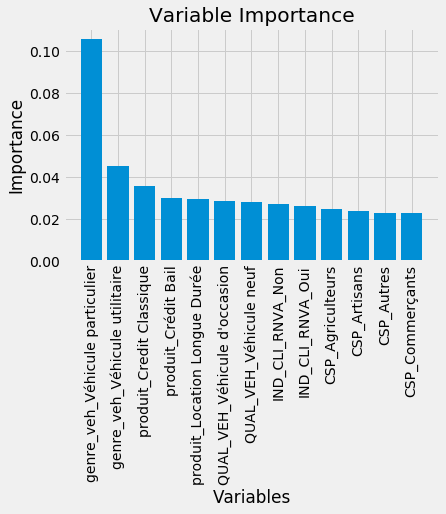

In [50]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
predictions_prob = rf.predict_proba(X_test)

# Get numerical feature importances
importances = sorted(list(rf.feature_importances_),reverse=True)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values[:13], importances[:13], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values[:13], feature_list[:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variables'); plt.title('Variable Importance');

In [51]:
ident = np.arange(0,12915,1)

In [52]:


default_prob = np.column_stack((ident,predictions_prob[:,1]))
default_prob = pd.DataFrame(default_prob)
default_prob.rename(columns={1:'prob'}, inplace=True)
default_prob.rename(columns={0:'key'}, inplace=True)

real_prob = np.column_stack((ident,y_test))
real_prob = pd.DataFrame(real_prob)
real_prob.rename(columns={1:'true'}, inplace=True)
real_prob.rename(columns={0:'key'}, inplace=True)

merged = pd.merge(real_prob, default_prob, on=['key'])

merged_sorted = merged.sort_values(by=["prob"],ascending=False)

length = len(predictions_prob[:,1])
ten_prct = int(0.1*length)
score = merged_sorted[0:ten_prct]

print(score)

         key  true      prob
10884  10884     1  1.000000
4036    4036     1  1.000000
9109    9109     1  1.000000
11558  11558     1  1.000000
3964    3964     1  1.000000
...      ...   ...       ...
9927    9927     1  0.905000
326      326     1  0.905000
6756    6756     1  0.905000
504      504     1  0.905000
6654    6654     1  0.904462

[1291 rows x 3 columns]


In [53]:
indice_10 = score["true"].value_counts(1)
indice_10[1]

0.9961270333075135

In [54]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, predictions_prob[:,1])
Gini =2*AUC-1
print(Gini)

0.9578201386033101


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=1337,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [13]:
rf_random.get_params()

{'cv': 3,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0